In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10

In [ ]:
# 데이터 로드
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

# 데이터 분할 확인
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
# 데이터 정규화
train_x = np.array(train_x/255.0, dtype = np.float32)
test_x = np.array(test_x/255.0, dtype = np.float32)

In [ ]:
# 2차원인 labels 데이터를 1차원으로 변경.
train_y = train_y.squeeze()
test_y = test_y.squeeze()

In [ ]:
# 모델 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

model = keras.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 모델 훈련
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=10,
                    validation_data=(test_x, test_y))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.3296 - loss: 1.7954 - val_accuracy: 0.5633 - val_loss: 1.2180
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.5974 - loss: 1.1443 - val_accuracy: 0.6305 - val_loss: 1.0242
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6664 - loss: 0.9412 - val_accuracy: 0.6753 - val_loss: 0.9325
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7089 - loss: 0.8267 - val_accuracy: 0.7055 - val_loss: 0.8474
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7413 - loss: 0.7372 - val_accuracy: 0.6977 - val_loss: 0.8783
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7715 - loss: 0.6566 - val_accuracy: 0.6973 - val_loss: 0.8896
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7897 - loss: 0.5974 - val_accuracy: 0.7163 - val_loss: 0.8665
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8088 - loss: 0.539

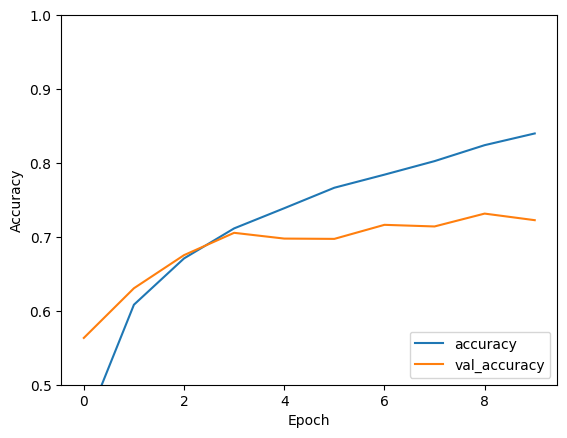

In [ ]:
# 훈련 결과
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
# 테스트 결과
test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
print('Test loss : ',test_loss)
print('Test accuracy : ',test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.7226 - loss: 0.9192
Test loss :  0.919154703617096
Test accuracy :  0.722599983215332


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
예측 값 :  3


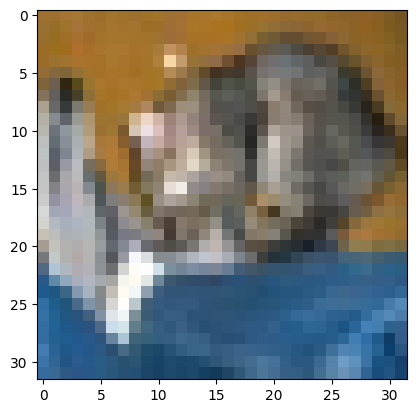

정답 :  3


In [ ]:
# 데이터 예측
preds = model.predict(test_x)

# 예측 결과
print('예측 값 : ',preds[0].argmax())
plt.imshow(test_x[0])
plt.show()
print('정답 : ', preds[0].argmax())